In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#import math
#from scipy import stats
from numpy import absolute
from numpy import mean
from sklearn import metrics
import pickle

In [2]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [4]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)


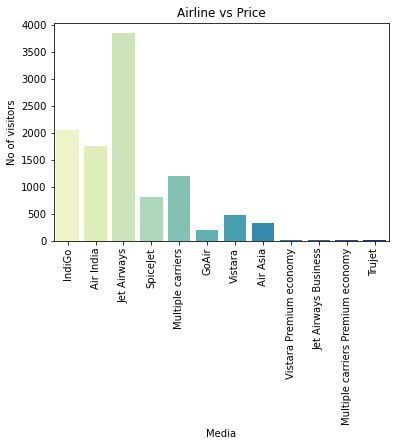

In [6]:
sns.countplot(x='Airline',data=df,palette='YlGnBu')
plt.title("Airline vs Price")
plt.xlabel("Media")
plt.ylabel("No of visitors")
plt.xticks(rotation=90)
plt.show()

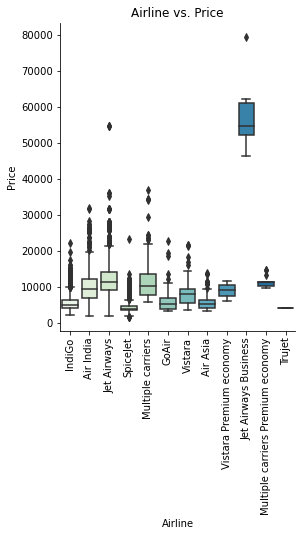

In [7]:
sns.catplot(data=df[['Airline','Price']],x='Airline',y='Price',kind='box',palette='GnBu')
plt.ylabel("Price")
plt.xlabel("Airline")
plt.title("Airline vs. Price")
plt.xticks(rotation=90)
plt.show()


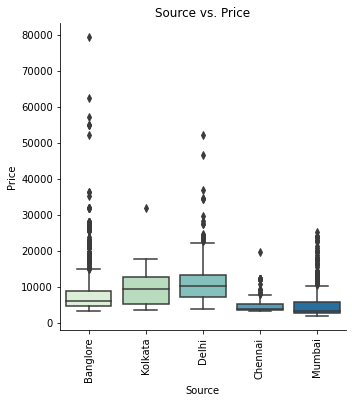

In [8]:
sns.catplot(data=df[['Source','Price']],x='Source',y='Price',kind='box',palette='GnBu')
plt.ylabel("Price")
plt.xlabel("Source")
plt.title("Source vs. Price")
plt.xticks(rotation=90)
plt.show()


In [9]:
df.replace({"New Delhi":"Delhi"},inplace=True)

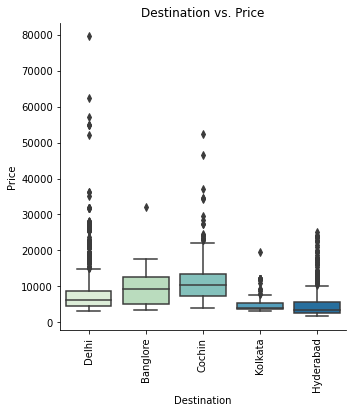

In [10]:
sns.catplot(data=df[['Destination','Price']],x='Destination',y='Price',kind='box',palette='GnBu')
plt.ylabel("Price")
plt.xlabel("Destination")
plt.title("Destination vs. Price")
plt.xticks(rotation=90)
plt.show()

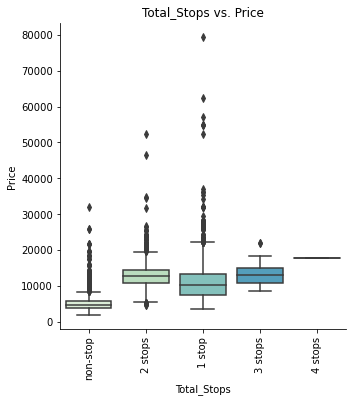

In [11]:
sns.catplot(data=df[['Total_Stops','Price']],x='Total_Stops',y='Price',kind='box',palette='GnBu')
plt.ylabel("Price")
plt.xlabel("Total_Stops")
plt.title("Total_Stops vs. Price")
plt.xticks(rotation=90)
plt.show()


In [12]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [13]:
df.drop(['Additional_Info','Route'],axis=1,inplace=True)


In [14]:
df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [15]:
df.drop(columns='Date_of_Journey',axis=1,inplace=True)


In [16]:
df.head()


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [17]:
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [18]:
df.drop(columns='Dep_Time',axis=1,inplace=True)

In [19]:
df["Arr_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute


In [20]:
df.drop(columns='Arrival_Time',axis=1,inplace=True)

In [21]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination'],drop_first=True)


In [22]:
df.head()


,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,non-stop,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,1,0,0
1,7h 25m,2 stops,7662,1,5,5,50,13,15,1,...,0,0,0,0,1,0,0,0,0,0
2,19h,2 stops,13882,9,6,9,25,4,25,0,...,0,0,0,1,0,0,1,0,0,0
3,5h 25m,1 stop,6218,12,5,18,5,23,30,0,...,0,0,0,0,1,0,0,0,0,0
4,4h 45m,1 stop,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df.columns


Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [24]:
df['Total_Stops'].value_counts()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [26]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [28]:
df.drop(columns='Duration',axis=1,inplace=True)

In [29]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,0,0,...,0,0,0,0,0,1,0,0,2,50
1,2,7662,1,5,5,50,13,15,1,0,...,0,0,1,0,0,0,0,0,7,25
2,2,13882,9,6,9,25,4,25,0,0,...,0,1,0,0,1,0,0,0,19,0
3,1,6218,12,5,18,5,23,30,0,0,...,0,0,1,0,0,0,0,0,5,25
4,1,13302,1,3,16,50,21,35,0,0,...,0,0,0,0,0,1,0,0,4,45


In [30]:
X=df.drop(columns='Price',axis=1,)
y=df['Price']

In [31]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [32]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [33]:
#pre-processing on the test data
test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute

test_data["Arr_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arr_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.replace({"New Delhi":"Delhi"},inplace=True)

test_data=pd.get_dummies(test_data,columns=['Airline','Source','Destination'],drop_first=True)

test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)



duration=list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins


test_data.drop(['Additional_Info','Route'],axis=1,inplace=True)
test_data.drop(columns='Date_of_Journey',axis=1,inplace=True)
test_data.drop(columns='Dep_Time',axis=1,inplace=True)
test_data.drop(columns='Arrival_Time',axis=1,inplace=True)
test_data.drop(columns='Duration',axis=1,inplace=True)


In [34]:
test_data.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Duration_hours,Duration_mins
0,1,6,6,17,30,4,25,0,0,0,...,0,1,0,0,1,0,0,0,10,55
1,1,12,5,6,20,10,20,0,0,1,...,0,0,1,0,0,0,0,0,4,0
2,1,21,5,19,15,19,0,0,0,0,...,0,1,0,0,1,0,0,0,23,45
3,1,21,5,8,0,21,0,0,0,0,...,0,1,0,0,1,0,0,0,13,0
4,0,24,6,23,55,2,45,0,0,0,...,0,0,0,0,0,1,0,0,2,50


In [35]:
test_data.columns


Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [38]:
y_pred= rf.predict(X_test)


In [39]:
rf.score(X_train,y_train)

0.9539389881890113

In [40]:
rf.score(X_test,y_test)

0.7920524100177923

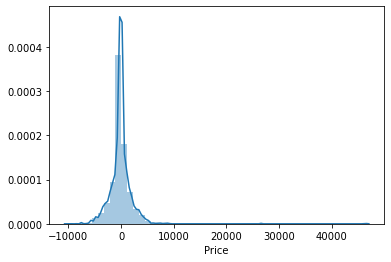

In [41]:
sns.distplot(y_test-y_pred)
plt.show()


In [42]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1187.241084354903
MSE:  4483777.647670064
RMSE:  2117.493246192314


In [43]:
metrics.r2_score(y_test,y_pred)


0.7920524100177923

In [44]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5, 30,num=6)]
min_samples_split=[2,5,10,15,100]
min_sample_leaf =[1,2,5,10]

In [45]:
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth' : max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_sample_leaf}

In [46]:
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 10,cv=5,random_state=42,n_jobs=1)

In [47]:
rf_cv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [48]:
prediction = rf_cv.predict(X_test)


In [49]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1162.2808855159246
MSE:  4141059.649834362
RMSE:  2034.9593730181352


In [50]:
file=open('flight_predictionN.pkl','wb')
pickle.dump(rf_cv,file)

In [51]:
model = open('flight_predictionN.pkl','rb')
forest = pickle.load(model)

In [52]:
y_prediction=forest.predict(X_test)

In [55]:
metrics.r2_score(y_test,y_prediction)


0.8079469050827951